# Linear regression

In [5]:
import pandas as pd

# Data
data = {
    'year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
    'month': [12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
    'interest_rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
    'unemployment_rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
    'index_price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]
}

df = pd.DataFrame(data)
df

,year,month,interest_rate,unemployment_rate,index_price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256
5,2017,7,2.50,5.6,1254
6,2017,6,2.50,5.5,1234
7,2017,5,2.25,5.5,1195
8,2017,4,2.25,5.5,1159
9,2017,3,2.25,5.6,1167


## StatsModel

In [11]:
import statsmodels.api as sm

x = df[['interest_rate', 'unemployment_rate']]
y = df['index_price']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            index_price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           4.04e-11
Time:                        19:24:08   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.4040    899.24

/Users/maksimrukomoynikov/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Plot a graphic to quicly check linear

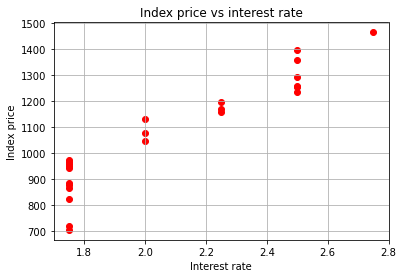

In [12]:
import matplotlib.pyplot as plt

plt.scatter(df['interest_rate'], df['index_price'], color='red')
plt.title('Index price vs interest rate')
plt.xlabel('Interest rate')
plt.ylabel('Index price')
plt.grid(True)
plt.show()

## Perform multiple linear regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['interest_rate', 'unemployment_rate']]
y = df.index_price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

model = LinearRegression()
model.fit(X_train, y_train)

print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 1596.479237057219
Coefficients: 
 [ 386.11269755 -232.3880109 ]
